In [1]:
import numpy as np
import pandas as pd
import gc
import random
import os
import math as mt
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
folder = "../data/"
features = pd.read_csv(folder + 'Features.csv')
y = pd.read_csv(folder + 'targets.csv')

In [3]:
features.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,...,source_screen_nameUnknown,source_system_tabnan,source_system_tabdiscover,source_system_tabexplore,source_system_tablisten with,source_system_tabmy library,source_system_tabnotification,source_system_tabradio,source_system_tabsearch,source_system_tabsettings
0,9176,86884,2,8,7,206471.0,308,3785,16654,48,...,0.0,0.0,0.000146,0.168302,0.004834,0.166252,0.0,0.443826,0.216640,0.0
1,19273,260594,4,9,5,284584.0,98,36868,71,48,...,0.0,0.0,0.093023,0.000000,0.000000,0.847384,0.0,0.000000,0.059593,0.0
2,19273,140755,4,9,5,225396.0,98,24602,51541,48,...,0.0,0.0,0.093023,0.000000,0.000000,0.847384,0.0,0.000000,0.059593,0.0
3,19273,27577,4,9,5,255512.0,7,31652,41992,48,...,0.0,0.0,0.093023,0.000000,0.000000,0.847384,0.0,0.000000,0.059593,0.0
4,9176,38706,2,8,7,187802.0,3,5191,9702,48,...,0.0,0.0,0.000146,0.168302,0.004834,0.166252,0.0,0.443826,0.216640,0.0


In [4]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [5]:
# Train and test split
X_train_all, X_test, y_train_all, y_test = train_test_split(features, y, test_size=0.2)

In [6]:
# Train and validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_train_all, y_train_all, test_size=0.2)

In [7]:
# Sampled data
idx = random.sample(range(0,X_train.shape[0]), 100000)
X_train_sampled = X_train.iloc[idx]
y_train_sampled = pd.DataFrame(y_train).iloc[idx]

# Random Forest

In [8]:
rf = RandomForestClassifier(n_estimators=100, oob_score=False, 
                            random_state=1,n_jobs=-1)
rf.fit(X_train_sampled, y_train_sampled)

/Users/sandeepkataria/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [9]:
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score validation: {accuracy:.3}')

Mean accuracy score validation: 0.673


In [10]:
precision, recall, fscore, support = score(y_test, predicted)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.6705083  0.67618933]
recall: [0.67364707 0.67306314]
fscore: [0.67207402 0.67462261]
support: [733148 742336]


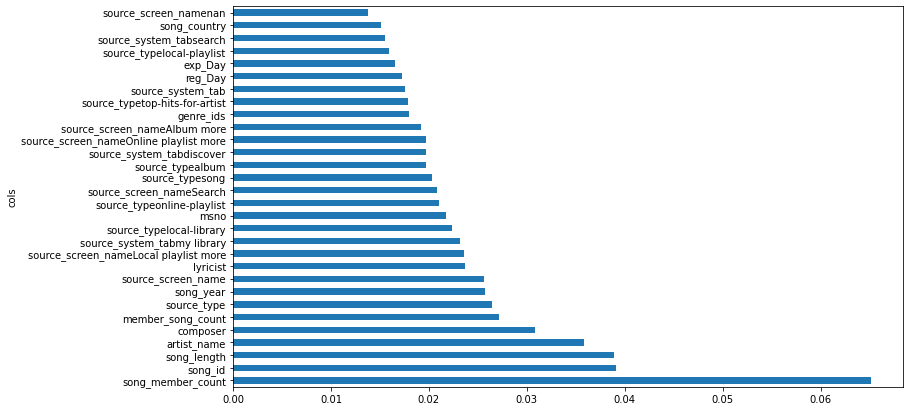

In [11]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 
                         'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(rf, X_train_sampled)

def plot_fi(fi):return fi.plot('cols', 'imp', 'barh', 
                               figsize=(12,7), legend=False)
plot_fi(fi[:30]);